# Lab 3: The application of Talib 
- TA-Lib，全称“Technical Analysis Library”, 即技术分析库，是Python金融量化的高级库，涵盖了158种股票、期货交易软件中常用的技术分析指标，如MACD、RSI、KDJ、动量指标、布林带等等。
![](https://s2.51cto.com/images/blog/202202/28181310_621ca0362867a75904.png?x-oss-process=image/watermark,size_16,text_QDUxQ1RP5Y2a5a6i,color_FFFFFF,t_30,g_se,x_10,y_10,shadow_20,type_ZmFuZ3poZW5naGVpdGk=/format,webp/resize,m_fixed,w_750)

#### Step:1 导入数据库

In [4]:
import talib
import pandas as pd
#查所有函数指标，一共158个
functions = talib.get_functions()
print(len(functions),functions)
#指标太多看不过来，没关系，还可以使用分类查看
groups = talib.get_function_groups()
print(groups)
#单独查看分类名称
print(groups.keys())
#查看每个分类的函数指标个数
table = pd.DataFrame({
'技术指标类别名称': list(groups.keys()),
'该类别指标个数': list(map(lambda x: len(x), groups.values()))
})
print(table)



158 ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJIST

---
#### Step 2: 导入数据


- 利用tushare API 接口导入数据

In [40]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#引入TA-Lib库
import talib as ta

#查看包含的技术指标和数学运算函数
#print(ta.get_functions())
#print(ta.get_function_groups())

ta_fun=ta.get_function_groups()
ta_fun.keys()

#使用tushare获取上证指数数据作为示例
import tushare as ts
df=ts.get_k_data('sh',start='2000-01-01')
df.index=pd.to_datetime(df.date)
df=df.sort_index()
df.head()


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


date     open    close     high      low      volume code
date                                                                       
2000-01-04  2000-01-04  1368.69  1406.37  1407.52  1361.21   9034020.0   sh
2000-01-05  2000-01-05  1407.83  1409.68  1433.78  1398.32  10580000.0   sh
2000-01-06  2000-01-06  1406.04  1463.94  1463.95  1400.25  13480500.0   sh
2000-01-07  2000-01-07  1477.15  1516.60  1522.82  1477.15  34515700.0   sh
2000-01-10  2000-01-10  1531.71  1545.11  1546.72  1506.40  31253500.0   sh

In [42]:
import cufflinks as cf
pipi=cf.QuantFig(df,title="上证指数",legend='top',name='GS')
pipi.add_bollinger_bands()
pipi.add_volume()
pipi.iplot()


--- 
#### Step 3: Some technical analysis using TaLib
1. 移动均线
- 移动平均线是技术分析理论中应用最普遍的指标之一，主要用于确认、跟踪和判断趋势，提示买入和卖出信号，在单边市场行情中可以较好的把握市场机会和规避风险。但是，移动平均线一般要与其他的技术指标或基本面相结合来使用，特别是当市场处于盘整行情时，其买入卖出信号会频繁出现，容易失真。
  - 代码： **ta.MA(close,timeperiod=30,matype=0)**
- 移动平均线系列指标包括：SMA简单移动平均线、EMA指数移动平均线、WMA加权移动平均线、DEMA双移动平均线、TEMA三重指数移动平均线、TRIMA三角移动平均线、KAMA考夫曼自适应移动平均线、MAMA为MESA自适应移动平均线、T3三重指数移动平均线。
  - 其中，close为收盘价，时间序列，timeperiod为时间短，默认30天，指标类型matype分别对应：0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)
- 不同类型的移动平均线也可通过自己的函数调用
  - ![](https://pic1.zhimg.com/80/v2-06e8299581a47119d601dfa33a5c15c0_720w.webp)

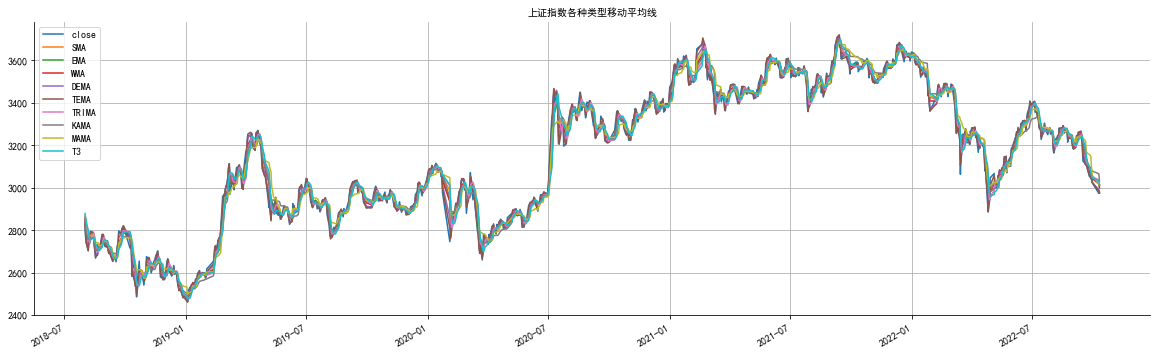

In [59]:
types=['SMA','EMA','WMA','DEMA','TEMA',
'TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)
df_ma.tail()
df_ma.loc['2018-08-01':].plot(figsize=(20,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数各种类型移动平均线',fontsize=10)
plt.xlabel('')
plt.grid()
plt.show()

In [60]:
# 试图转换period 
N=[5,30,120,250]
for i in N:
      df['ma_'+str(i)]=ta.EMA(df.close,timeperiod=i)
df.tail()

date     open    close     high      low       volume code  \
date                                                                           
2022-09-28  2022-09-28  3089.10  3045.07  3089.10  3044.86  230098650.0   sh   
2022-09-29  2022-09-29  3067.47  3041.20  3076.76  3026.08  230030416.0   sh   
2022-09-30  2022-09-30  3042.17  3024.39  3054.61  3021.93  204115336.0   sh   
2022-10-10  2022-10-10  3026.94  2974.15  3029.45  2968.28  243404828.0   sh   
2022-10-11  2022-10-11  2978.06  2979.79  2986.91  2953.50  208635950.0   sh   

                   ma_5        ma_30       ma_120       ma_250  
date                                                            
2022-09-28  3077.969719  3174.083437  3246.915683  3309.271623  
2022-09-29  3065.713146  3165.510312  3243.515423  3307.135594  
2022-09-30  3051.938764  3156.405776  3239.893515  3304.882641  
2022-10-10  3026.009176  3144.647338  3235.501061  3302.247321  
2022-10-11  3010.602784  3134.011381  3231.274432  3299.677940

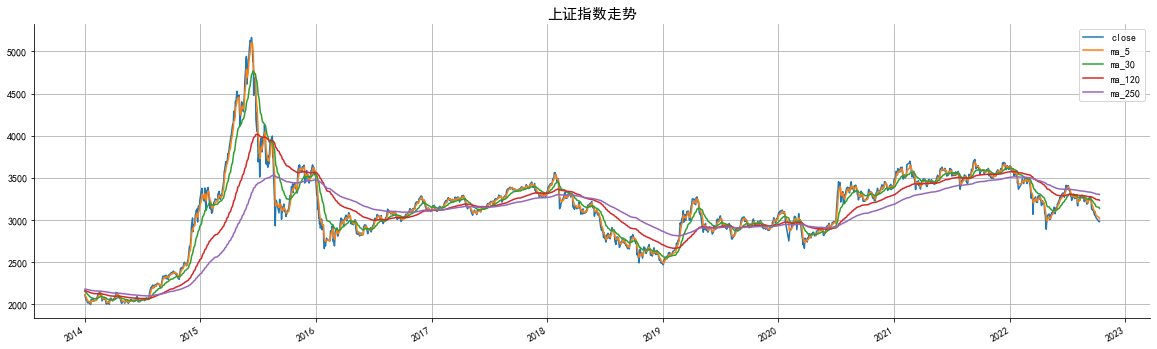

In [62]:
df.loc['2014-01-01':,['close','ma_5','ma_30','ma_120','ma_250']].plot(figsize=(20,6))
ax=plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数走势',fontsize=15)
plt.xlabel('')
plt.grid()
plt.show()

2. 布林带
- 布林带(Bollinger Band)，由压力线、支撑线价格平均线组成，一般情况价格线在压力线和支撑线组成的上下区间中游走，区间位置会随着价格的变化而自动调整。
- 布林线的理论使用原则是：**当股价穿越最外面的压力线（支撑线）时，表示卖点（买点）出现**。当股价延着压力线（支撑线）上升（下降）运行，虽然股价并未穿越，但若回头突破第二条线即是卖点或买点
- 计算方法：首先计出过去 N 日收巿价的标准差 SD(Standard Deviation) ，通常再乘 2 得出 2 倍标准差， Up 线为 N日平均线加 2 倍标准差， Down 线则为 N日平均线减 2 倍标准差。
- 代码：ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
  - Upper线： 中间线+2*过去20交易日收盘价的标准差
  - Down线：中间线-2*过去20交易日收盘价的标准差


In [66]:
H_line,M_line,L_line=ta.BBANDS(df.close,timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line
df1.tail()


close       H_line     M_line       L_line
date                                                    
2022-09-28  3045.07  3305.306272  3166.5590  3027.811728
2022-09-29  3041.20  3306.436179  3158.5120  3010.587821
2022-09-30  3024.39  3308.853275  3150.4825  2992.111725
2022-10-10  2974.15  3314.765767  3139.8660  2964.966233
2022-10-11  2979.79  3314.626544  3128.8600  2943.093456

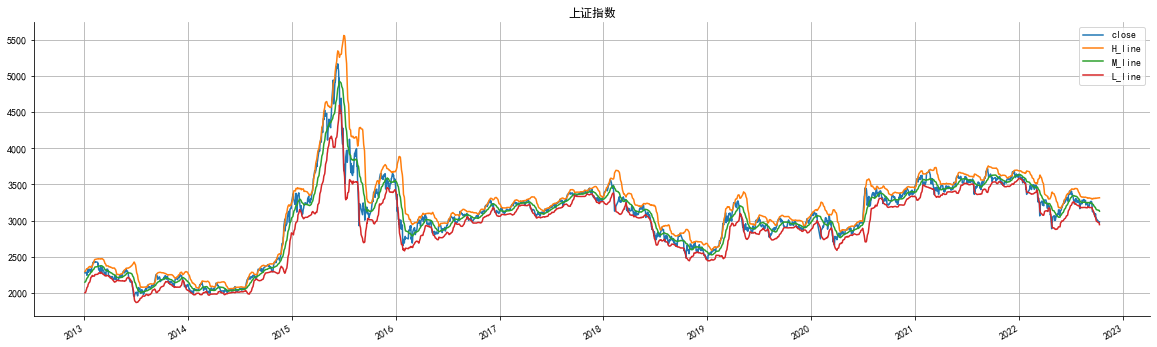

In [69]:
df1.loc['2013-01-01':].plot(figsize=(20,6))
ax=plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
plt.title('上证指数')
plt.xlabel('')
plt.grid()
plt.show()

----
#### Step 4：Other technical analysis 
![](https://pic3.zhimg.com/80/v2-f0c2a8904c14d03ce5a452fb6ab8e652_720w.webp)

In [71]:
df2=pd.DataFrame(df.close)
df2['HT']=ta.HT_TRENDLINE(df.close)
periods=np.array([3]*len(df),dtype=float)
df2['MAVP']=ta.MAVP(df.close,periods)
df2['MIDPOINT']=ta.MIDPOINT(df.close)
df2['MIDPRICE']=ta.MIDPRICE(df.high,df.low)
df2['SAR']=ta.SAR(df.high,df.low)
df2['SAREXT']=ta.SAREXT(df.high,df.low)
df2.tail()

close           HT         MAVP  MIDPOINT  MIDPRICE  \
date                                                                
2022-09-28  3045.07  3172.043427  3063.386667  3154.435  3161.515   
2022-09-29  3041.20  3162.481093  3060.043333  3152.500  3152.125   
2022-09-30  3024.39  3151.702886  3036.886667  3144.095  3150.050   
2022-10-10  2974.15  3138.519712  3013.246667  3105.845  3111.230   
2022-10-11  2979.79  3124.052824  2992.776667  3087.035  3103.840   

                    SAR       SAREXT  
date                                  
2022-09-28  3171.180355 -3171.180355  
2022-09-29  3150.969099 -3150.969099  
2022-09-30  3128.489061 -3128.489061  
2022-10-10  3107.177249 -3107.177249  
2022-10-11  3079.397799 -3079.397799

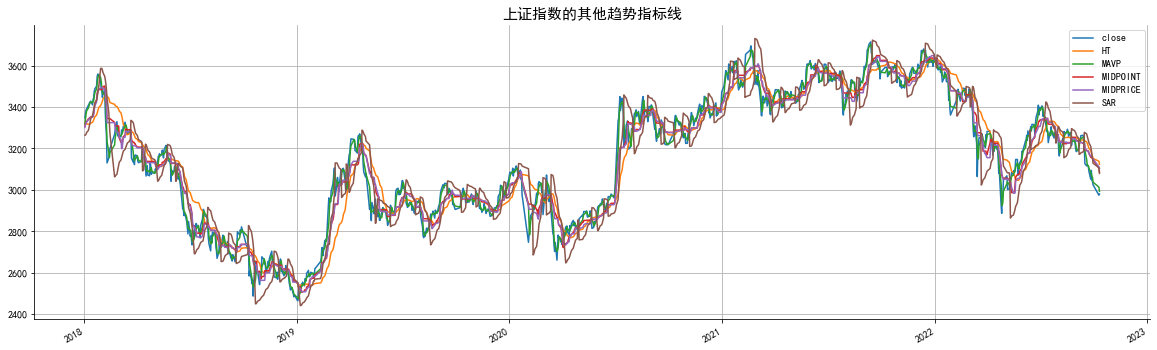

In [74]:
df2.loc['2018-01-01':,['close','HT','MAVP','MIDPOINT','MIDPRICE','SAR']].plot(figsize=(20,6))
ax=plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的其他趋势指标线',fontsize=15)
plt.xlabel('')
plt.grid()
plt.show()

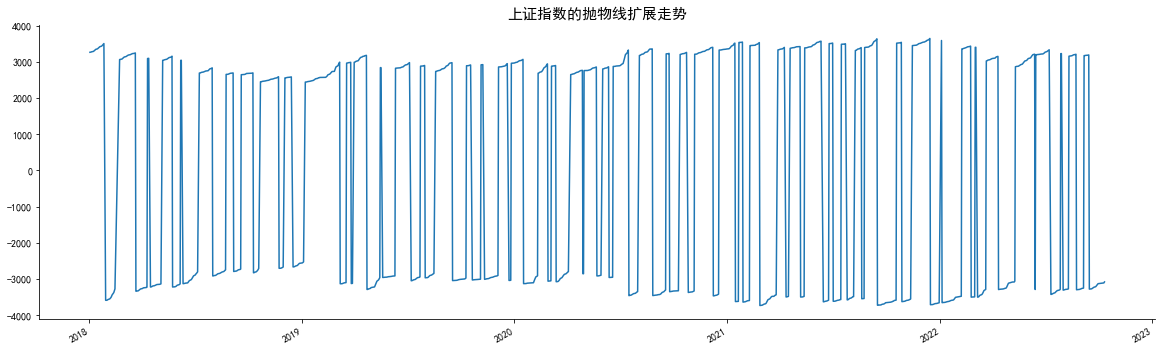

In [76]:
# 抛物线趋势
df2.loc['2018-01-01':,'SAREXT'].plot(figsize=(20,6))
ax=plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的抛物线扩展走势',fontsize=15)
plt.xlabel('')
plt.show()
